# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import *

In [2]:
# VER BASE DE DATOS:

df_vinos = pd.read_csv('../data/raw/base_datos_vinos.csv', sep=';')
df_vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_vinos.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
# VER CALIDADES DE LOS VINOS:

df_vinos['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
# CONVERTIR LA COLUMNA QUALITY A LABEL:

df_vinos['label'] = df_vinos['quality'].apply(lambda x: 0 if x <= 4 else (1 if x == 6 else 2))

df_vinos['label'].value_counts()

label
2    898
1    638
0     63
Name: count, dtype: int64

In [7]:
# SEPARAR VARIABLES INDEPENDIENTES Y DEPENDIENTES:
X = df_vinos.drop(columns=['quality', 'label'])
y = df_vinos['label']

X, y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# DATOS ESCALADOS:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# ENTRENAR MODELO KNN:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [11]:
# EVALUAR MODELO:

print("Exactitud:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 
print("Reporte Clasificatorio:\n", classification_report(y_test, y_pred))

Exactitud: 0.596875
Confusion Matrix:
 [[  3   3   6]
 [  2  70  56]
 [  4  58 118]]
Reporte Clasificatorio:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       0.53      0.55      0.54       128
           2       0.66      0.66      0.66       180

    accuracy                           0.60       320
   macro avg       0.51      0.48      0.49       320
weighted avg       0.59      0.60      0.60       320



La exactitud general del modelo KNN con k=3 fue de aproximadamente 59.7%.
El modelo tiene un rendimiento desigual entre clases:
- Clase 0 (baja calidad): precisión y recall bajos, lo que indica que el modelo tiene dificultad para identificar vinos de baja calidad.
- Clase 1 (calidad media): el modelo tiene un rendimiento aceptable.
- Clase 2 (calidad alta): obtiene mejores métricas, con una f1-score de 0.66.
Esto sugiere que el modelo tiende a clasificar más fácilmente los vinos de calidad media y alta, pero no los de calidad baja, a pesar de ser la minoría de vinos de esta categoria.

In [12]:
# OPTIMIZAR EL MODELO:

accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'k={k}, Accuracy={acc:.4f}')

k=1, Accuracy=0.7156
k=2, Accuracy=0.6062
k=3, Accuracy=0.5969
k=4, Accuracy=0.5969
k=5, Accuracy=0.5969
k=6, Accuracy=0.6031
k=7, Accuracy=0.6188
k=8, Accuracy=0.6188
k=9, Accuracy=0.6156
k=10, Accuracy=0.6156
k=11, Accuracy=0.6312
k=12, Accuracy=0.6188
k=13, Accuracy=0.6500
k=14, Accuracy=0.6219
k=15, Accuracy=0.6406
k=16, Accuracy=0.6094
k=17, Accuracy=0.6375
k=18, Accuracy=0.6062
k=19, Accuracy=0.6156
k=20, Accuracy=0.6125


Se probó el modelo con valores de k entre 1 y 20, los mejores resultados se obtuvieron en:
- k=1 con un 72% de exactitud
- k=13 con un 65% de exactitud
- k=15 con un 64% de exactitud
- Sin embargo el primer resultado k=1 es algo inusual por lo que podría haber mucha inexactitud en el modelo, además excede de más de un 5% del resto de resultados.
- Sería recomendable guiarnos más por los resultas de k=13 por su mayor resultado entre todos los demás resultados y al estar más en concordancia el resultado k=13 con el resto, excluyendo el resultado k=1. 


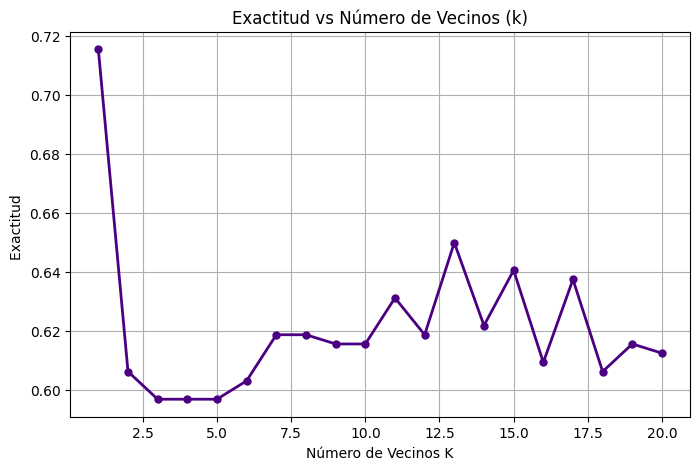

In [14]:
# VISUALIZAR RESULTADOS:

plt.figure(figsize=(8, 5))
plt.plot(range(1, 21), accuracies, marker='o', color='indigo', linestyle='-', linewidth=2, markersize=5)
plt.xlabel('Número de Vecinos K')
plt.ylabel('Exactitud ')
plt.title('Exactitud vs Número de Vecinos (k)')
plt.grid(True)
plt.show()